# Quora Questions Analysis

## Is It Possible to Differentiate Between Sincere Questions and Insincere Questions?


The aim of this project consists in building and training a model that allow us to evaluate questions from users in the Quora platform as either Sincere or Insincere.

The Dataset was created by Quora's team. They also classified the questions as either Sincere or Insincere.

I've chosen to build a Naive Bayes Classifier Model from scratch to train and test the model. In the end of the project, I've compared my results with a classifier provided by Scikit-learn.

<br>


### Data Cleaning and Visualizing

The data comprises of 1 306 122 entries, 1 225 312 (93.8%) of Sincere Questions and 80 810 (6.2%) of Insincere questions. This shows a very unbalanced dataset.

I've deleted a column from the original dataset as it was not needed. the question's id, as they were indexed to begin with.

I've also constructed two Wordclouds to help visualize the most common words from Sincere and Insincere questions.

Images and Code are shown below.

<br>

### Data Processing

This model will classify questions based on a Bag of Words Approach. As such, further processing is necessary.

Instead of having a Data Frame with questions represented as full strings, every question was processed to be a list of words.

I'm using two different types of words, each in its own Data Frame, one where they retain their original formatting, and another where they were stemmed using a Porter Stemmer from NLTK. Both will be used to train different models, to see the impact of both techniques on a classifier. Finally, every question was stripped of their stop words and punctuation, as they don't convey meaning to the question itself.

Every question will then be represented by a list of words.

<br>

### Images

![image1.png](../static/pie-chart.png)
<p><center>Image 1: Pie Chart Representing the Proportion of Different Questions.</center></p>
<br>

![image2.png](../static/sincere-wordcloud.png)
<p><center>Image 2: Most Common Words in Sincere Questions</center></p>
<br>

![image3.png](../static/insincere-wordcloud.png)
<p><center>Image 3: Most Common Words in Insincere Questions</center></p>

In [1]:
# IMPORTS
import pandas as pandas
import numpy as numpy
import matplotlib.pyplot as pyplot
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from PIL import Image
from wordcloud import WordCloud


# nltk imports (already run, here if needed)
# nltk.download('punkt')
# nltk.download('stopwords')

In [2]:
# CONSTANTS
DATA_PATH = '../data/data.csv'
STEMMED_WORDS_BACKUP = '../data/stemmed-words.json'
NOT_STEMMED_WORDS_BACKUP = '../data/not-stemmed-words.json'
WORDCLOUD_THUMBS_UP_MASK = '../static/thumbs-up.png'
WORDCLOUD_THUMBS_DOWN_MASK = '../static/thumbs-down.png'
WORDCLOUD_THUMBS_UP_FILE = '../static/sincere-wordcloud.png'
WORDCLOUD_THUMBS_DOWN_FILE = '../static/insincere-wordcloud.png'

In [3]:
# FUNCTIONS


# clean data
def processData(data, stemmer = False):
    
    
    # variables
    processedQuestions = []
    tmpData = data
    
    
    # apply a function to process each question
    processedQuestions = tmpData['question_text'].apply(processQuestion, stemmer = stemmer)
    tmpData['question_text'] = processedQuestions 
    
    
    # return
    return tmpData


# defining a function to process each question
# it may or may not stem a word
# in the future, two models will be compared, one with stemmed words and other with no stemmed words
# stopwords are removed as they don't confer meaning
def processQuestion(question, stemmer = False, stopwords = set(stopwords.words('english'))):
    
    
    # variables
    tmpList = []
    words = word_tokenize(question)
    
    
    # if using stemmer
    if stemmer == True:
        
        
        # create porter stemmer
        porterStemmer = PorterStemmer()
        
        
        # iterate over every word and process it
        # check for alphanumeric character
        # lowercase
        # check for stopwords
        # stem
        for word in words:
            if word.isalpha():
                word = word.lower()
                if word not in stopwords:
                    word = porterStemmer.stem(word)
                    tmpList.append(word)
        
        
    # if not using stemmer
    else:
        
        
        # iterate over every word and process it
        # check for alphanumeric character
        # lowercase
        # check for stopwords
        for word in words:
            if word.isalpha():
                word = word.lower()
                if word not in stopwords:
                    tmpList.append(word)
                    
                    
    # return questions as a list of words
    return tmpList

In [11]:
# IMPORT DATA
data = pandas.read_csv(DATA_PATH)

In [12]:
# CHARACTERIZE DATA
print(f'Data Size: {data["target"].size}\n')
print(f'Are there any missing values? -> {data.isnull().values.any()}\n')
print(f'Are there any empty questions? -> {(data["question_text"].str.len() == 0).any()}\n\n')
print(f'Data Head:\n{data.head()}\n\n')

Data Size: 1306122

Are there any missing values? -> False

Are there any empty questions? -> False


Data Head:
                    qid                                      question_text  \
0  00002165364db923c7e6  How did Quebec nationalists see their province...   
1  000032939017120e6e44  Do you have an adopted dog, how would you enco...   
2  0000412ca6e4628ce2cf  Why does velocity affect time? Does velocity a...   
3  000042bf85aa498cd78e  How did Otto von Guericke used the Magdeburg h...   
4  0000455dfa3e01eae3af  Can I convert montra helicon D to a mountain b...   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  




In [13]:
# DATA CLEANING
data = data.drop('qid', axis = 1)

Number of Sincere Questions: 1225312
Number of Insincere Questions: 80810


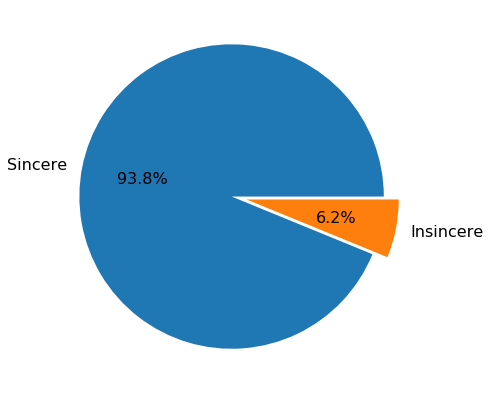

In [14]:
# DATA VISUALIZATION
typeOfQuestions = data['target'].value_counts()
sincere = typeOfQuestions[0]
insincere = typeOfQuestions[1]
print(f'Number of Sincere Questions: {sincere}')
print(f'Number of Insincere Questions: {insincere}')


# PIE CHART
# pie chart
pyplot.figure(figsize = [7, 7])
categories = ['Sincere', 'Insincere']
sizes = [sincere, insincere]
pyplot.pie(sizes, labels = categories, textprops = {'fontsize': 16}, autopct = '%1.1f%%', explode = [0, 0.1])
pyplot.show()

In [15]:
# PROCESS QUESTIONS
notStemmedData = processData(data)
stemmedData = processData(data, stemmer = True)

In [19]:
# SAVE BACKUPs
stemmedData.to_json(STEMMED_WORDS_BACKUP)
notStemmedData.to_json(NOT_STEMMED_WORDS_BACKUP)

In [ ]:
# # load processed data
# stemmedData = pandas.read_json(STEMMED_WORDS_BACKUP)
# notStemmedData = pandas.read_json(NOT_STEMMED_WORDS_BACKUP)

In [16]:
# DATA PROCESSING


# get type of question indexes
sincereWordsIndex = notStemmedData[notStemmedData['target'] == 0].index
insincereWordsIndex = notStemmedData[notStemmedData['target'] == 1].index


# create a series for all words in each type of question
sincereWordsSeries = notStemmedData['question_text'].loc[sincereWordsIndex]
insincereWordsSeries = notStemmedData['question_text'].loc[insincereWordsIndex]


# create a series with all words individually for each type of question
sincereWordsSeries = pandas.Series([word for words in sincereWordsSeries for word in words])
insincereWordsSeries = pandas.Series([word for words in insincereWordsSeries for word in words])


# create a series to count unique words
uniqueSincereWordsSeries = sincereWordsSeries.value_counts()
uniqueInsincereWordsSeries = insincereWordsSeries.value_counts()

Number of Words in Sincere Questions: 7406163
Number of Unique Words in Sincere Questions: 169409

Top Words Used in Sincere Questions:
best      61636
get       59445
would     58072
people    43397
like      43133
good      36813
one       32242
india     29350
make      26233
time      22197
dtype: int64



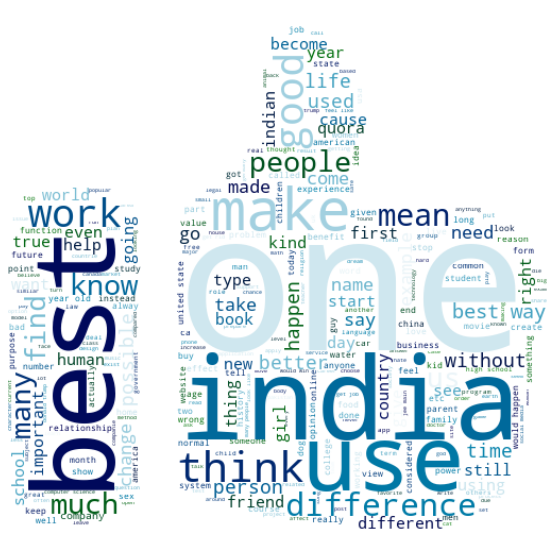

In [17]:
# DATA VISUALIZATION


# create a mask
icon = Image.open(WORDCLOUD_THUMBS_UP_MASK)
mask = Image.new(mode = 'RGB', size = icon.size, color = (255, 255, 255))
mask.paste(icon, box = icon)
rgbArray = numpy.array(mask)


# create string
sincereWordsString = ' '.join(sincereWordsSeries.tolist())


# sincere words
print(f'Number of Words in Sincere Questions: {sincereWordsSeries.size}')
print(f'Number of Unique Words in Sincere Questions: {uniqueSincereWordsSeries.size}\n')
print(f'Top Words Used in Sincere Questions:\n{uniqueSincereWordsSeries[:10]}\n')
pyplot.figure(figsize = [10, 10])
wordCloud = WordCloud(mask = rgbArray,
                      background_color = 'white',
                      max_words = 400,
                      colormap = 'ocean',
                      max_font_size = 300)
wordCloud.generate(sincereWordsString)
pyplot.imshow(wordCloud, interpolation = 'bilinear')
pyplot.axis('off')
pyplot.show()


# backup
wordCloud.to_file(WORDCLOUD_THUMBS_UP_FILE)

Number of Words in Insincere Questions: 707357
Number of Unique Words in Insincere Questions: 35873

Top Words Used in Insincere Questions:
people     12954
trump       6466
like        5962
women       5959
would       4325
men         4216
think       3887
white       3714
many        3571
muslims     3492
dtype: int64



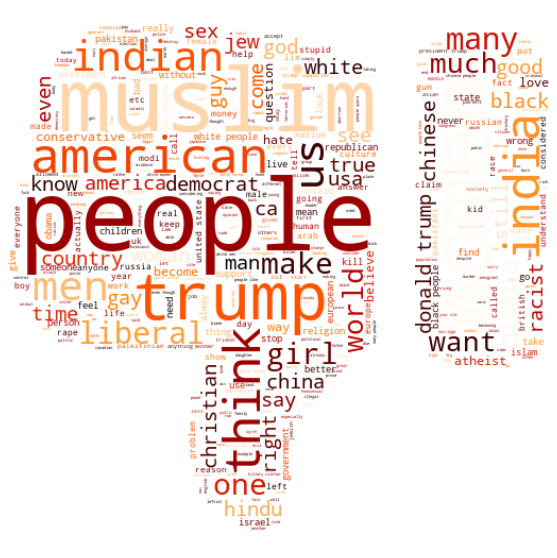

In [18]:
# DATA VISUALIZATION


# create a mask
icon = Image.open(WORDCLOUD_THUMBS_DOWN_MASK)
mask = Image.new(mode = 'RGB', size = icon.size, color = (255, 255, 255))
mask.paste(icon, box = icon)
rgbArray = numpy.array(mask)


# create strings
insincereWordsString = ' '.join(insincereWordsSeries.tolist())


# insincere words
print(f'Number of Words in Insincere Questions: {insincereWordsSeries.size}')
print(f'Number of Unique Words in Insincere Questions: {uniqueInsincereWordsSeries.size}\n')
print(f'Top Words Used in Insincere Questions:\n{uniqueInsincereWordsSeries[:10]}\n')
pyplot.figure(figsize = [10, 10])
wordCloud = WordCloud(mask = rgbArray,
                      background_color = 'white',
                      max_words = 400,
                      colormap = 'gist_heat',
                      max_font_size = 300)
wordCloud.generate(insincereWordsString)
pyplot.imshow(wordCloud, interpolation = 'bilinear')
pyplot.axis('off')
pyplot.show()


# backup
wordCloud.to_file(WORDCLOUD_THUMBS_DOWN_FILE)